<a href="https://colab.research.google.com/github/Ixchelrs01/Ejercicios-en-clase-1/blob/main/Histogramas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creación de un archivo .CSV

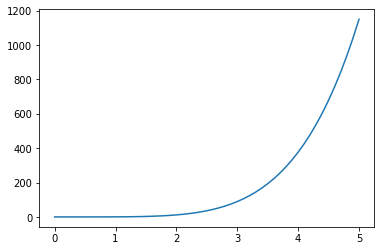

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math


def fx(x):
  return ((x**5)*np.exp(-1))


def fxunNumero(x):
  if x>=0:
    return ((x**5)*math.exp(-1))
  else:
    return 0

def fxVectorEscribir(x):
  fxvector=[]

  valoresdelafuncion= open("/content/drive/MyDrive/FisicaComputacional/Histogramas/clase221121/valoresdelafuncion.csv","w")


  for i in np.nditer(x):
    fxvector.append(fxunNumero(i))
    linea = str(i)+","+ str(fxunNumero(i))+"\n"
    valoresdelafuncion.write(linea)

  valoresdelafuncion.close()

  return fxvector

xintervalo= np.arange(0.0,5.1,0.1)
fxVectorEscribir(xintervalo)
plt.plot(xintervalo, fx(xintervalo))
plt.show()



Lectura de un archivo .CSV

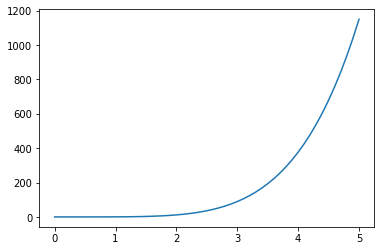

In [ ]:
import matplotlib.pyplot as plt

archivo = open("/content/drive/MyDrive/FisicaComputacional/Histogramas/clase221121/valoresdelafuncion.csv","r")
lineas= archivo.readlines()


xvalues=[]
fxvalues=[]

for x in lineas:
  xvalues.append(float(x.split(",")[0]))
  fxvalues.append(float(x.split(",")[1]))
archivo.close()

plt.plot(xvalues,fxvalues)
plt.show()


Modificación de un archivo .CSV

In [ ]:
import math

def mifuncio(y):
  if y>=0:
    return ((y**5)*math.exp(-y))
  else:
    return 0

archivoentrada=open("/content/drive/MyDrive/FisicaComputacional/Histogramas/clase221121/valoresdelafuncion.csv","r")
archivosalida= open("/content/drive/MyDrive/FisicaComputacional/Histogramas/clase221121/archivodesalida.csv","w")

for line in archivoentrada:
  par= line.split(",")
  x= float(par[0])
  y= float(par[1])
  fy= mifuncio(y)
  lineaparaescribir= str(x)+", "+ str(fy)+"\n"
  archivosalida.write(lineaparaescribir)

archivoentrada.close()
archivosalida.close()






Creación de un histograma a partir de un archivo .CSV

In [2]:
#Creacion de histogramas
#Fecha: Noviembre 25, 2021

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


file= "http://opendata.cern.ch/record/5201/files/Dimuon_DoubleMu.csv"

particles= pd.read_csv(file)

data= np.genfromtxt(file,delimiter=",", names=["Run","Event", "type1", "E1", "px1", "py1", "pz1","pt1", "eta1", "phi", "Q1", "type2", "E2", "px2", "py2", "pz2","pt2", "eta2", "phi2", "Q2","M"], skip_header=1)


#Creación de un histograma
#grafica= px.histogram(data["M"],data["M"],nbins=1000)
#grafica.update_layout(title=r"Masa Invariable",xaxis_title=r"Masa Invariable [GeV]", yaxis_title="Eventos")
#grafica.show()


#Creación de un histograma con variables
grafica1= px.histogram(data["pt1"],data["pt1"],nbins=1000)
grafica1.update_layout(title=r"Momento Transverso",xaxis_title=r"Momento Transverso [GeV]", yaxis_title="Eventos")
grafica2= px.histogram(data["pt2"],data["pt2"],nbins=1000, color_discrete_sequence=["indianred"], opacity=0.75)
grafica1.add_trace(grafica2.data[0])
grafica1.show()


#particles=pd.read_csv("")
#particles.head()

#Creación de un histograma con plt
#plt.show()
#plt.hist(data["M"])
#particles.head()
